**CSI 4106 Introduction to Artificial Intelligence** <br/>
*Assignment 1: Data Preparation*

# Identification

Name: Rina Osman<br/>
Student Number: 300222206

# Exploratory Analysis

## Import important libraries

In [334]:
import pandas as pd
import numpy as np
import os
import sys
# print(sys.executable)

In [335]:
# # Load the dataset
url = "https://raw.githubusercontent.com/rinaxosman/csi4106-a1/main/dermatology_database_1.csv"
dataset = pd.read_csv(url)


## Guidelines

The following are the questions for Assignment 1. Under each question, we have provided an initial code cell. You are encouraged to add additional code cells to maintain logical separation of your code. For instance, place the definition of a function in one cell and its execution in a subsequent cell. This approach will help preserve clarity and enhance readability by avoiding the inclusion of excessive code within a single cell.

1. **Analysis of Missing Values**: Examine the datasets to identify and assess ssing values in various attributes. Missing values may be represented by symbols ch as '?', empty strings, or other placeholders.

    <b>1.1 In the list of options, what are the datasets that contain missing values? ecifically, which attribute or attributes has missing values? </b>

    - The dermatology dataset (dataset #2) and the dataset #7 have missing values. 
    - Specifically, the following attribute is missing in dataset #2: age.
    - And these attributes for dataset #7: Name, Occupation, Monthly_Inhand_Salary, Type_of_Loan. 

    <b> 1.2 Describe the methodology used for this investigation, and provide the rresponding code.</b>

   - To investigate missing values in the datasets, I followed a simple methodology. First, I reviewed the datasets and predetermined that the common indicators for empty or missing values were: Null/NaN, '?', '', and '_______'.
   - To investigate the missing values, I first imported the necessary libraries, pandas for data handling and urllib.request for accessing the datasets. I then created a dictionary with the names and paths of all the datasets to check.
   - Next, I defined a function called check_missing_values that reads each dataset and counts the missing values while also handling any encoding issues. Finally, I looped through each dataset,uusing this function to check for missing values and printed the count for those that contained them.

In [336]:
import pandas as pd
import urllib.request

datasets_info = {
    '01': 'glass.csv',
    '02': 'dermatology_database_1.csv',
    '03': 'Maternal%20Health%20Risk%20Data%20Set.csv',
    '04': 'car.data',
    '05': 'WineQT.csv',
    '06': '16P.csv',
    '07': ['train.csv', 'test.csv']
}
github_base_url = "https://raw.githubusercontent.com/rinaxosman/csi4106-a1/main/"

def check_missing_values(dataset_url, dataset_name):
    try:
        data = pd.read_csv(dataset_url, header=None, low_memory=False)
    except UnicodeDecodeError:
        data = pd.read_csv(dataset_url, header=None, low_memory=False, encoding='ISO-8859-1')
    
    # counts missing values indicated by the following : NaN, '?', '', and '_______'
    missing_count = (
        data.isnull().sum().sum() + 
        data.isin(['?', '']).sum().sum() + 
        (data == '_______').sum().sum() + 
        (data == '').sum().sum()
    )
    
    if missing_count > 0:
        print(f"Dataset '{dataset_name}' has {missing_count} missing values.")

for folder, file_info in datasets_info.items():
    if isinstance(file_info, list):  # case for 07 with 2 files
        for file_name in file_info:
            dataset_url = f"{github_base_url}{folder}/{file_name}"
            check_missing_values(dataset_url, f"{folder}/{file_name}")
    else:
        dataset_url = f"{github_base_url}{folder}/{file_info}"
        check_missing_values(dataset_url, f"{folder}/{file_info}")


Dataset '02/dermatology_database_1.csv' has 8 missing values.
Dataset '07/train.csv' has 67133 missing values.
Dataset '07/test.csv' has 33491 missing values.


<b>1.3 Data imputation involves replacing missing or incomplete data with substituted values to preserve the dataset's integrity for subsequent analysis. Propose imputation strategies for each attribute with missing values.</b>

For the dermatology dataset (dataset #2), the missing attribute is "age."
- Since a portion of the "Age" attribute is missing, we can impute the missing values ("?") by replacing them with the average age of all the available ages in the dataset. Using the mean is helpful because it provides a central value that represents the ages of most patients. Here’s the code to fill in the missing values:

In [337]:
# impute missing vals with mean age
mean_age = dataset[dataset['age'] != '?']['age'].astype(float).mean()
dataset['age'] = dataset['age'].replace('?', mean_age)
print("Mean age:", mean_age)

Mean age: 36.29608938547486


For dataset #7, we identified missing values in the attributes "Name," "Occupation," "Monthly_Inhand_Salary," and "Type_of_Loan."

- For the "Name" attribute, it would be best to leave them as missing because they are unique attrs. and cant effectively be imputed, and this attribute is not relevant to the dataset study.

- For the "Occupation" attribute, we can fill in the missing values using the mode, which is the most common value in the dataset. This reflects the most frequent occupation.

- For "Monthly_Inhand_Salary," we can replace the missing values with the median salary. The median is a better choice because it provides a more accurate central value.

- Finally, for "Type_of_Loan," the missing values are empty cells which are not to be replaced because it is due to the fact they have 0 loans

In [338]:
import pandas as pd
import urllib.request

# dataset #7
train_url = "https://raw.githubusercontent.com/rinaxosman/csi4106-a1/main/07/train.csv"
data = pd.read_csv(train_url)

# Imputation for "Name": Since names are unique, we will leave these as missing

# Imputation for "Occupation"
# Fill "_______" with NaN
data['Occupation'].replace('_______', pd.NA, inplace=True)
mode_occupation = data['Occupation'].mode()[0]
data['Occupation'].fillna(mode_occupation, inplace=True)

# Imputation for "Monthly_Inhand_Salary"

data['Monthly_Inhand_Salary'].replace('', pd.NA, inplace=True)
# replaces missing salary values with the median salary of the occupation
data['Monthly_Inhand_Salary'] = data.groupby('Occupation')['Monthly_Inhand_Salary'].transform(
    lambda x: x.fillna(x.median())
)

selected_rows = data.iloc[[9, 2, 33]]
pd.set_option('display.max_columns', None)
print(selected_rows)

        ID Customer_ID     Month             Name   Age          SSN  \
9   0x160f  CUS_0x21b1  February  Rick Rothackerj    28  004-07-5839   
2   0x1604   CUS_0xd40     March    Aaron Maashoh  -500  821-00-0265   
33  0x1633  CUS_0x1cdb  February           Deepaa    21  615-06-7821   

   Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
9     Teacher      34847.84            3037.986667                  2   
2   Scientist      19114.12            3260.465000                  3   
33  Developer      35547.71            3007.490624                  7   

    Num_Credit_Card  Interest_Rate Num_of_Loan  \
9                 4              6           1   
2                 4              3           4   
33                5              5           0   

                                         Type_of_Loan  Delay_from_due_date  \
9                                 Credit-Builder Loan                    7   
2   Auto Loan, Credit-Builder Loan, Personal Loan,...        

C:\Users\rinax\AppData\Local\Temp\ipykernel_35064\3288117445.py:6: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(train_url)
C:\Users\rinax\AppData\Local\Temp\ipykernel_35064\3288117445.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Occupation'].replace('_______', pd.NA, inplace=True)
C:\Users\rinax\AppData\Local\Temp\ipykernel_35064\3288117445.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chain

Based on the printed outputs, we can see that I have successfully imputed values for "occupation" and Monthly_Inhand_Salary. The occupation was imputed as 'Teacher' for Rick Rothaker, and the monthly in-hand salary of Aaron Maashoh was imputed as 3260.465 based on his occupation as a Scientist.

2. **Select and familiarize yourself with a classification task:** Choose one of e provided datasets for further investigation. It is advisable to select a dataset ntaining a sufficiently large number of examples, ideally around 1,000, to ensure bust results when applying machine learning algorithms in the subsequent assignment.

- I initially attempted to run the analysis with a larger dataset, but due to hardware limitations on my laptop, I was unable to process it efficiently (it kept freezing while trying to create the graphs). So, I chose the dermatology dataset, which is smaller and manageable for my current system. Despite its size, this dataset provides a solid foundation for classification tasks and allows me to explore the application of ML in healthcare.


    <b>2.1 What is the objective of the task? Is it intended for a specific plication? Do you possess expertise in this particular domain of application?</b>

    - The goal of this task is to figure out which type of erythemato-squamous disease a patient has using the Dermatology Dataset. These diseases include psoriasis, seborrheic dermatitis, lichen planus, pityriasis rosea, chronic dermatitis, and pityriasis rubra pilaris. They all have similar signs, like redness and scaling of the skin, which makes it tough to tell them apart without tests.
    - The dataset includes clinical information about the patients and results from looking at skin samples under a microscope. It's by analyzing this data that they hope to make diagnosing these diseases easier and more accurate.
    - I don’t have a background in dermatology, but I find this topic interesting. Working with this dataset will help me learn more about how ML can be used in healthcare.s


3. **Attribute Analysis**: 

    3.1 Determine which attributes lack informativeness and should be excluded to prove the effectiveness of the machine learning analysis. If all features are emed relevant, explicitly state this conclusion.

    - For this dataset, all of the features seem relevant to the task. Each clinical and histopathological attribute contributes important information for diagnosing erythemato-squamous diseases. Therefore, I have decided not to exclude any features, as they all have the potential to improve the machine learning analysis.


    3.2 Examine the distribution of each attribute (column) within the dataset. Utilize histograms or boxplots to visualize the distributions, identifying any underlying patterns or outliers.

In [339]:
# !pip install matplotlib seaborn

   erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0         2        2                 0        3                   0   
1         3        3                 3        2                   1   
2         2        1                 2        3                   1   
3         2        2                 2        0                   0   
4         2        3                 2        2                   2   

   polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                  0                   0                         0   
1                  0                   0                         0   
2                  3                   0                         3   
3                  0                   0                         0   
4                  2                   0                         2   

   knee_and_elbow_involvement  scalp_involvement  family_history  \
0                           1                  0               0   
1               

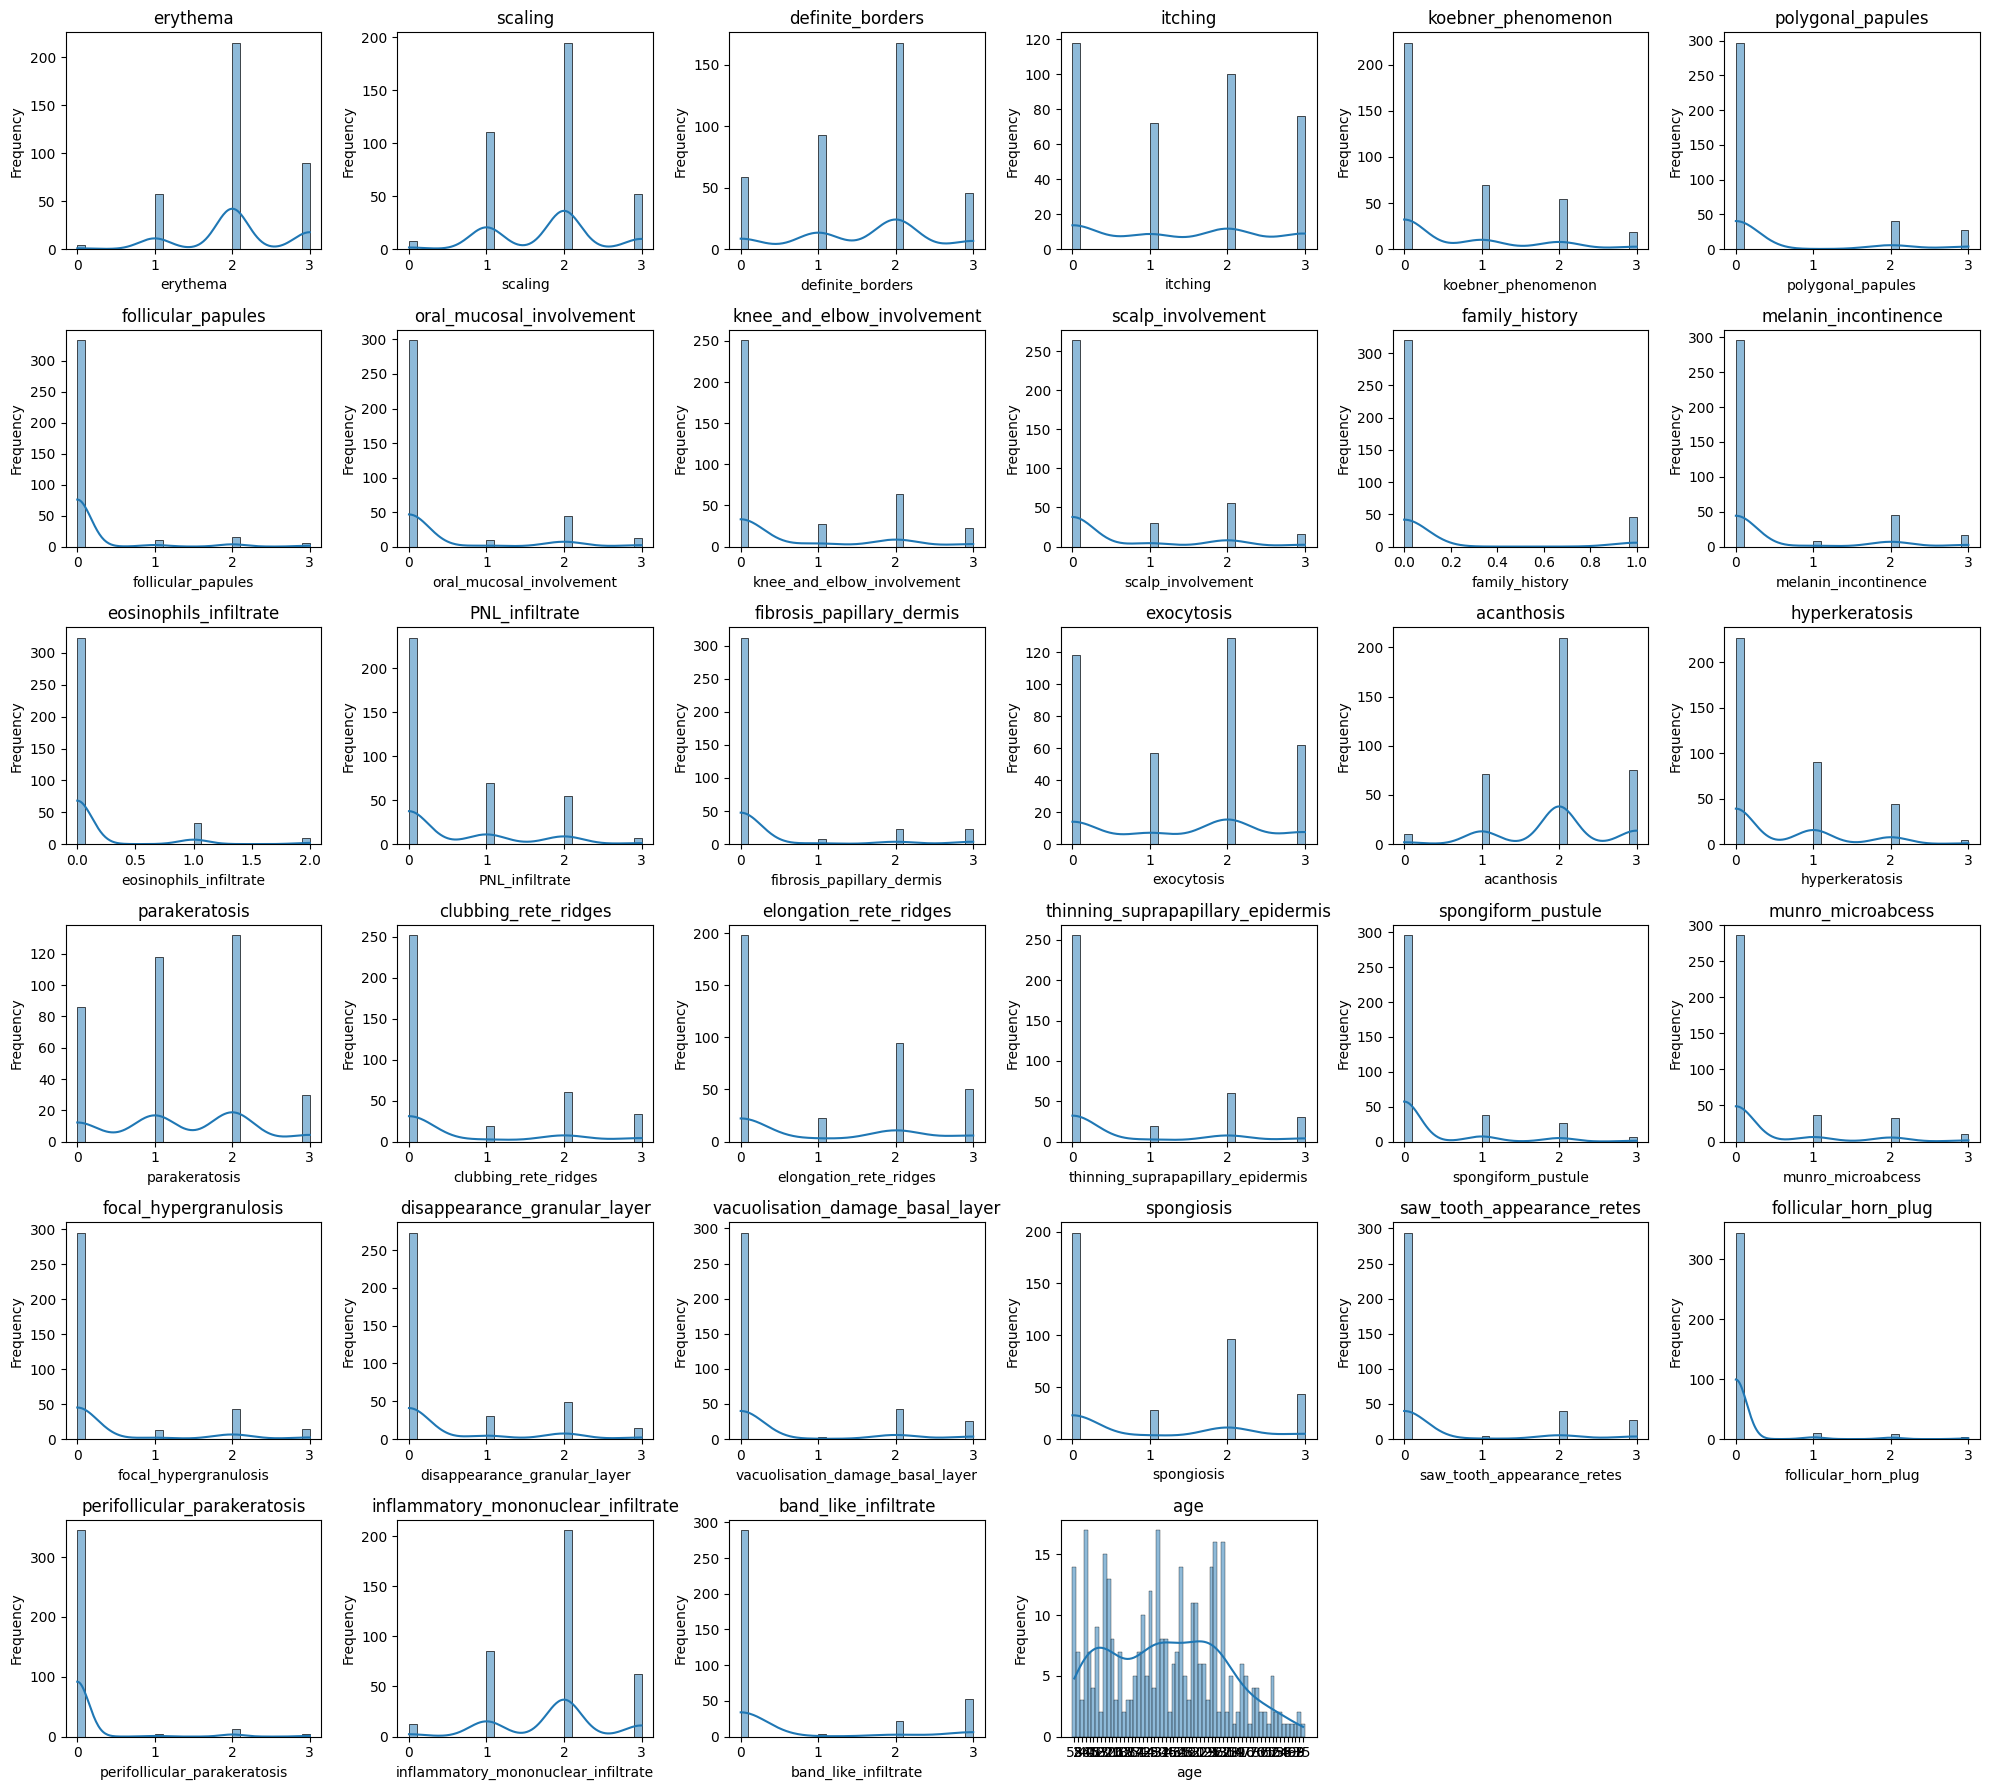

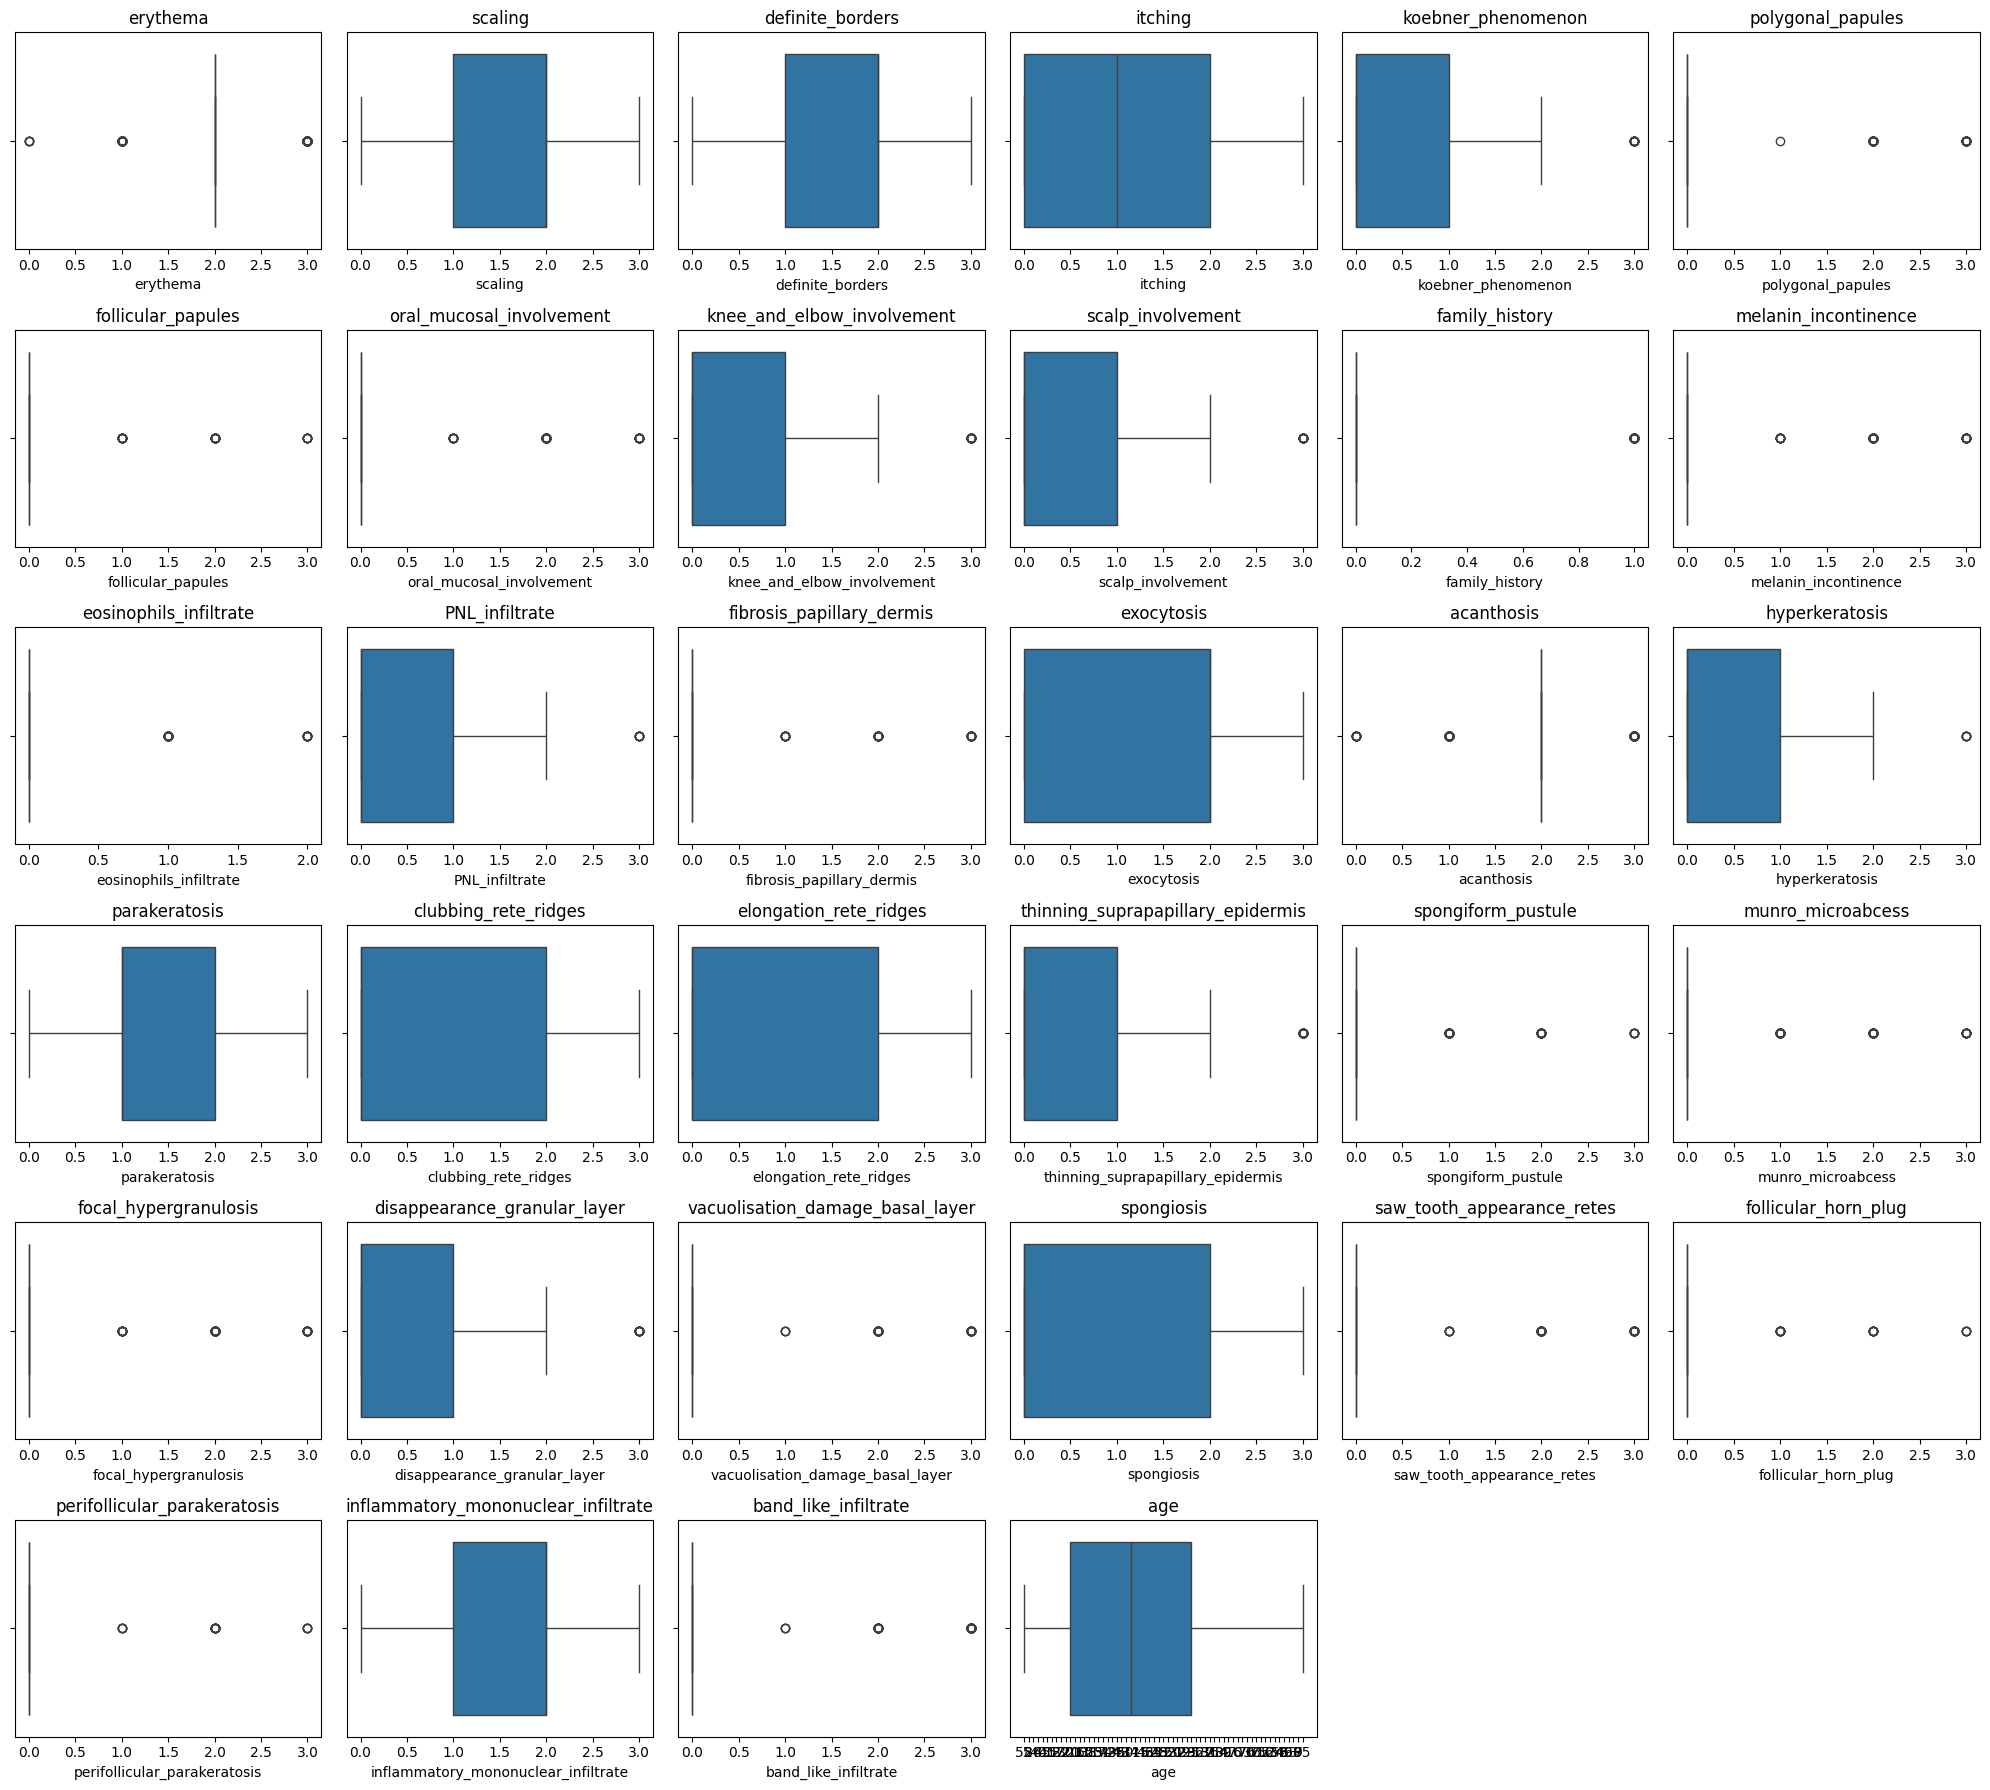

In [340]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/rinaxosman/csi4106-a1/main/dermatology_database_1.csv"
data = pd.read_csv(url)

print(data.head())

# distributions of each attribute
attributes = data.columns[:-1]  # not including class col
num_attributes = len(attributes)

num_rows = (num_attributes // 6) + (num_attributes % 6 > 0)

#histograms for each attribute
plt.figure(figsize=(20, num_rows * 3))
for i, attr in enumerate(attributes):
    plt.subplot(num_rows, 6, i + 1)  
    sns.histplot(data[attr], bins=30, kde=True)
    plt.title(attr)
    plt.xlabel(attr)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Boxplots 
plt.figure(figsize=(20, num_rows * 3))
for i, attr in enumerate(attributes):
    plt.subplot(num_rows, 6, i + 1)
    sns.boxplot(x=data[attr])
    plt.title(attr)

plt.tight_layout()
plt.show()

4. **Class Distribution Analysis**: Investigate the distribution of class labels within the dataset. Employ bar plots to visualize the frequency of instances for each class, and assess whether the dataset is balanced or imbalanced.

C:\Users\rinax\AppData\Local\Temp\ipykernel_35064\1326654466.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


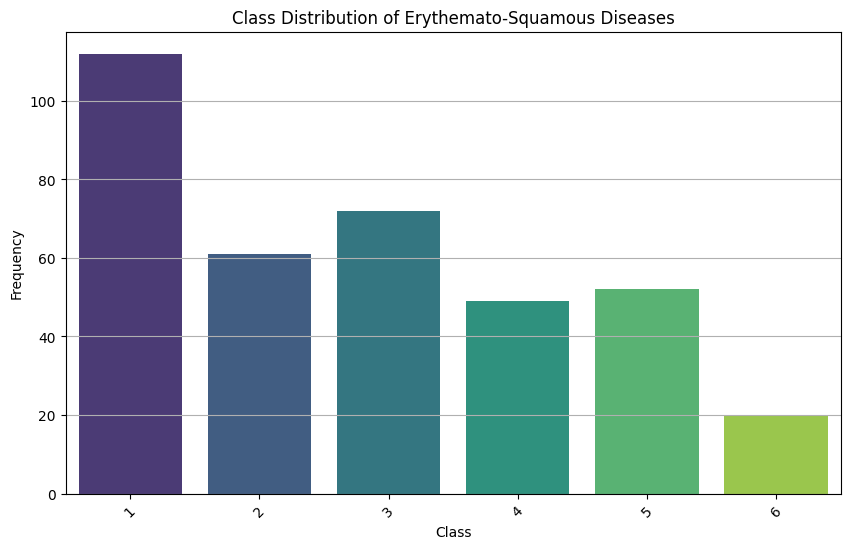

class
1    112
3     72
2     61
5     52
4     49
6     20
Name: count, dtype: int64


In [341]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/rinaxosman/csi4106-a1/main/dermatology_database_1.csv"
data = pd.read_csv(url)

class_counts = data['class'].value_counts()

#  bar plot for class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Class Distribution of Erythemato-Squamous Diseases')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

print(class_counts)


The graph shows how many cases there are for different types of erythemato-squamous diseases in the dataset. This indicates an imbalance in the dataset, where certain diseases are more prevalent than others, like class 1, which may impact the performance of predictive modeling .

5. **Preprocessing**: 

    5.1 For numerical features, determine the best transformation to use. Indicate e transformation that seems appropriate and why. Include the code illustrating how  apply the transformation. For at least one attribute, show the distribution before d after the transformation. See [Preprocessing data](https://scikit-learn.org/able/modules/preprocessing.html).


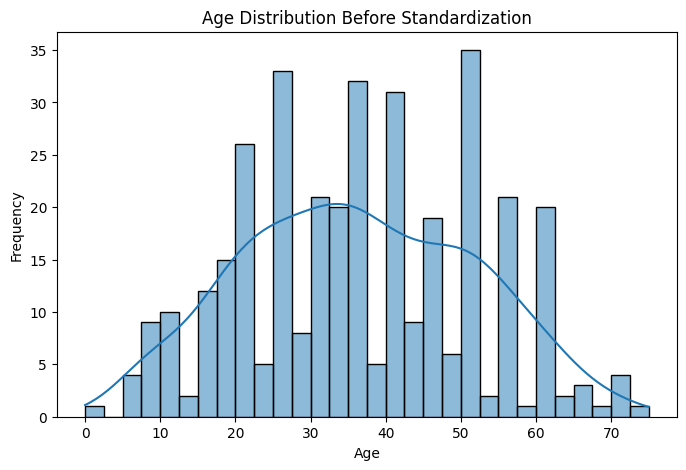

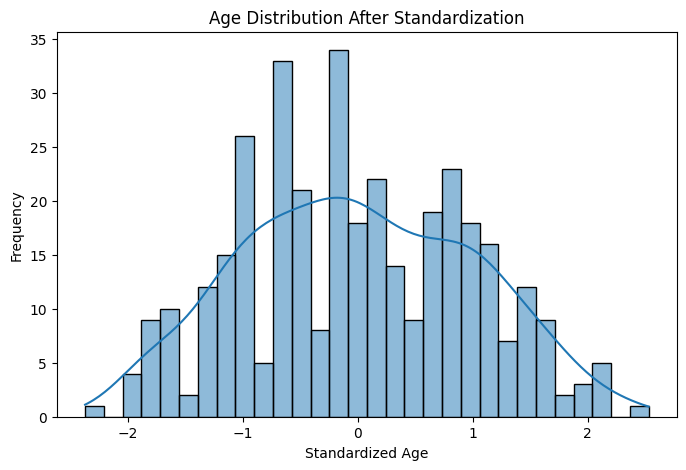

In [342]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/rinaxosman/csi4106-a1/main/dermatology_database_1.csv"
data = pd.read_csv(url)

# Convert age to numeric, replacing '?' with NaN
# this line of code was produced thanks to chat gpt-3, I was stuck on this for a while
data['age'] = pd.to_numeric(data['age'], errors='coerce') 

# original distribution of 'age'
plt.figure(figsize=(8, 5))
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Age Distribution Before Standardization')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# standardization of the 'age' attribute
scaler = StandardScaler()
data['age_scaled'] = scaler.fit_transform(data[['age']])

#tandardized distribution of 'age'
plt.figure(figsize=(8, 5))
sns.histplot(data['age_scaled'], bins=30, kde=True)
plt.title('Age Distribution After Standardization')
plt.xlabel('Standardized Age')
plt.ylabel('Frequency')
plt.show()


   5.2 For categorical features, show how to apply [one-hot encoding](https://ikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).  your dataset does not have categorical data, show how to apply the one-hot encoder  the label (target variable).

In [343]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# categorical feature 'family_history'
categorical_feature = data[['family_history']]

# Applyiung One Hot encoding
encoder = OneHotEncoder(sparse_output=False)
family_history_encoded = encoder.fit_transform(categorical_feature)

# Create a data frame with the encoded values
encoded_df = pd.DataFrame(family_history_encoded, columns=encoder.get_feature_names_out(['family_history']))

# Mergesencoded data back into the original data frame
data = pd.concat([data, encoded_df], axis=1)

# first few rows to verify encoding
print(data.head())



   erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0         2        2                 0        3                   0   
1         3        3                 3        2                   1   
2         2        1                 2        3                   1   
3         2        2                 2        0                   0   
4         2        3                 2        2                   2   

   polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                  0                   0                         0   
1                  0                   0                         0   
2                  3                   0                         3   
3                  0                   0                         0   
4                  2                   0                         2   

   knee_and_elbow_involvement  scalp_involvement  family_history  \
0                           1                  0               0   
1               

6. **Training and target data**: Set the Python variable `X` to designate the data and `y` to designate the target class. Make sure to select only the informative features.

In [344]:
X = data.drop(columns=['class'])  # excludes target 'class' column to create feature set
y = data['class']  # target class/labels

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (366, 37)
Target shape: (366,)


7. **Training and test sets**: Split the dataset into training and testing sets. Reserve 20% of data for testing.

In [345]:
from sklearn.model_selection import train_test_split

# (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

Training features shape: (292, 37)
Testing features shape: (74, 37)
Training target shape: (292,)
Testing target shape: (74,)


This split is consistent with 20% of the data for testing, as 20% of 366 samples ( dataset size) is approx 74, and 80% is 292.

--------------------------------------------------------------------------

# References

Make sure you provide references to ALL sources used (articles, code, algorithms).

- https://stackoverflow.com/questions/46000191/utf-8-codec-cant-decode-byte-0x92-in-position-18-invalid-start-byte

## AI transcript
**Hint:** To share a link to your colab notebook, click on "share" on the top right. Then, under *General access* , change *Restricted* to "Anyone with the link".